<a href="https://colab.research.google.com/github/stefanogiagu/corso_AI_2025/blob/main/notebooks/es_3.4/MetodiAI_Fis2025_E7_PCA_tSNE_UMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Esercitazione E7: algoritmi per la visualizzazione di campioni multivariati e riduzione dimensionale applicazione al dataset Ising 2D

**Task:** Scopo: familiarizzare con l'implementazione di algoritmi di riduzione dimensionale (PCA, tSNE, UMAP) usando i package scikit-learn e umap-learn

**Dataset:**

Ising2D: vedere precedenti esercitazioni [20.3](https://github.com/stefanogiagu/corso_AI_2025/tree/main/notebooks/es_20.3) e [27.3](https://github.com/stefanogiagu/corso_AI_2025/tree/main/notebooks/es_27.3)

MNIST: benchmark dataset costituito da immagini di caratteri numerici scritti a mano ([wikipedia](https://en.wikipedia.org/wiki/MNIST_database), [Y. LeCun Original web page](http://yann.lecun.com/exdb/mnist/))

**Link repositorio gdrive con i dati:** [link](https://drive.google.com/drive/folders/1HeDwSsMMSMi6d-ovbWB39qzRTeM4ZM2N?usp=share_link)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# lettura dataset Ising2D
with open("/content/drive/MyDrive/ising_data/ising_results_20x20.pkl", "rb") as f:
  data  = pickle.load(f)
  results = data["results"]

In [4]:
# estrazione configurazioni e label (T, M)

T = []
M = []
S = np.empty(shape=(len(results),20,20))
for idx, entry in enumerate(results):
  T.append(float(entry["temperature"]))
  M.append(entry["magnetization"][-1]) # magnetizzazione finale eg ultimo valore di array con m(t)
  S[idx] = entry["final_state"].reshape((1,20,20))

In [5]:
T = np.array(T)
M = np.array(M)

print(T.shape)
print(M.shape)
print(S.shape)

(30000,)
(30000,)
(30000, 20, 20)


In [6]:
# legge dataset Ising2D
import numpy as np

# creiamo ulteriori label
ord_sele = (T < 2.0)
cri_sele = ((T >= 2.0) & (T <= 2.5))
dis_sele = (T > 2.5)

Y = np.zeros(shape=T.shape)
Y[ord_sele]=0
Y[cri_sele]=1
Y[dis_sele]=2

print('Y shape: ',Y.shape)

Y shape:  (30000,)


In [7]:
S[ord_sele]

array([ True,  True,  True, ..., False, False, False])

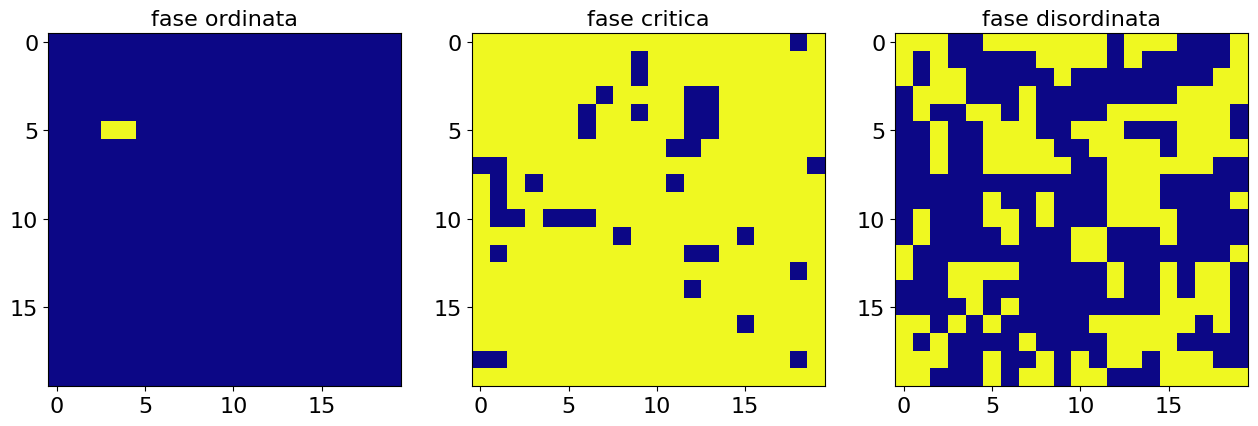

In [12]:
# print tre esempi di configurazioni

# set colourbar map
cmap_args=dict(cmap='plasma_r')

# plot states
fig, axarr = plt.subplots(nrows=1, ncols=3)

ieve = 11 #seleziono ul'evento 11
axarr[0].imshow((S[ord_sele])[np.random.randint(0,len(S[ord_sele]))],**cmap_args)
axarr[0].set_title('fase ordinata',fontsize=16)
axarr[0].tick_params(labelsize=16)

axarr[1].imshow((S[cri_sele])[np.random.randint(0,len(S[cri_sele]))],**cmap_args)
axarr[1].set_title('fase critica',fontsize=16)
axarr[1].tick_params(labelsize=16)

im=axarr[2].imshow((S[dis_sele])[np.random.randint(0,len(S[dis_sele]))],**cmap_args)
axarr[2].set_title('fase disordinata',fontsize=16)
axarr[2].tick_params(labelsize=16)

fig.subplots_adjust(right=2.0)

plt.show()

**Parte 1:**

Analisi PCA: campione Ising2D

1.   implementare un'analisi a componenti prncipali (PCA) usando la libreria sklearn:

`from sklearn.decomposition import PCA`

2.   printare il valore della varianza spiegata per le prime 10 componenti PCA

3.   graficare lo scatter plot delle prime due componenti principali in due plot distinti: uno in cui ogni configurazione viene colorata in accordo al valore della temeperatura, e un secondo in cui ogni configurazione viene colorata in accordo ad una delle tre clasi *(0,1,2)* corrispondenti alle configurazioni ordinate, critiche e disordinate, rispettivamente.

4.   graficare l'istogramma della prima componente principale per i dati in fase ordinata, critica, e disordinata, usando colori diversi. Graficare lo scatter plot della prima componente principale in funzione della magnetizzazione media. Cosa se ne deduce?

In [ ]:
#code

In [ ]:
#@title Soluzione 1.1 e 1.2

from sklearn.decomposition import PCA

#NOTA: prima di applicare la PCA è importante normalizzare le feature in modo che abbiano
# varianze simili. Nel caso specifico del campione Ising2D non è necessario farlo
# perché i valori di ogni spin (pixel) sono già compresi tra -1 e 1 per costruzione

# istanzio una PCA con 10 componenti
pca = PCA(n_components=10)

# calcolo la trasformazione PCA su i dati di input (fit) e contestualmente la applico
# ai dati stessi (fit_transform)
pca_result = pca.fit_transform(S.reshape((S.shape[0],20*20))) #nota PCA vuole come input vettori di shape (N, d)


# varianza spiegata (è un vettore corrispondente alle n_componewents)
exp_var = pca.explained_variance_ratio_

for i in range(0,len(exp_var)):
  print('explained variance componente: ',i, ' = ', exp_var[i])
print('Explained variance totale delle prime 10 componenti della PCA: {}'.format(sum(exp_var)))

#NOTA: l'explained variance indica quanto ciascuna componente contribusice alla varianza totale del campione
# si osserva come la prima componente risulta di gran lunga più infromativa delle altre nel spiegare la varianza
# del campione



explained variance componente:  0  =  0.4502677464235661
explained variance componente:  1  =  0.030121676810385686
explained variance componente:  2  =  0.02926972029477561
explained variance componente:  3  =  0.028536570228017276
explained variance componente:  4  =  0.028098436904668293
explained variance componente:  5  =  0.0071368541568140416
explained variance componente:  6  =  0.0069361585363996265
explained variance componente:  7  =  0.006877527088001007
explained variance componente:  8  =  0.006749657359751967
explained variance componente:  9  =  0.006658053870772314
Explained variance totale delle prime 10 componenti della PCA: 0.600652401673152


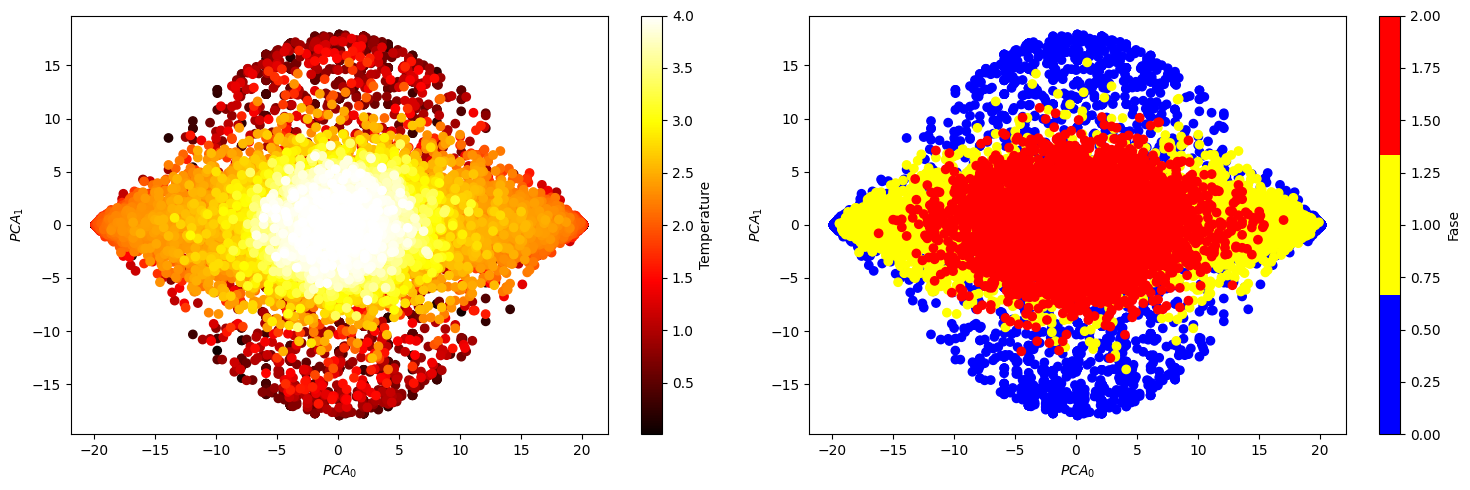

In [ ]:
#@title Soluzione 1.3

import matplotlib.pyplot as plt
%matplotlib inline

# grafico PCA
# pca_results prodotto da fit_transform è un array numpy di dimensione (numero eventi, n_components)
# che conteiene il valore delle n_components della PCA

# plottiamo la prima componente vs la seconda

#colorando i punti in accordo alla temperatura T_ising
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(pca_result[:,0], pca_result[:,1], c=T, cmap='hot')
cbar = plt.colorbar()
cbar.set_label('Temperature')
plt.xlabel('$PCA_0$')
plt.ylabel('$PCA_1$')
# e in accordo alla label Y_ising

# custom colormap
from matplotlib.colors import ListedColormap
colors = ["blue","yellow","red"]
my_cmap = ListedColormap(colors, name="my_cmap")

plt.subplot(1,2,2)
plt.scatter(pca_result[:,0], pca_result[:,1], c=Y, cmap=my_cmap)
cbar = plt.colorbar()
cbar.set_label('Fase')
plt.xlabel('$PCA_0$')
plt.ylabel('$PCA_1$')
plt.tight_layout()

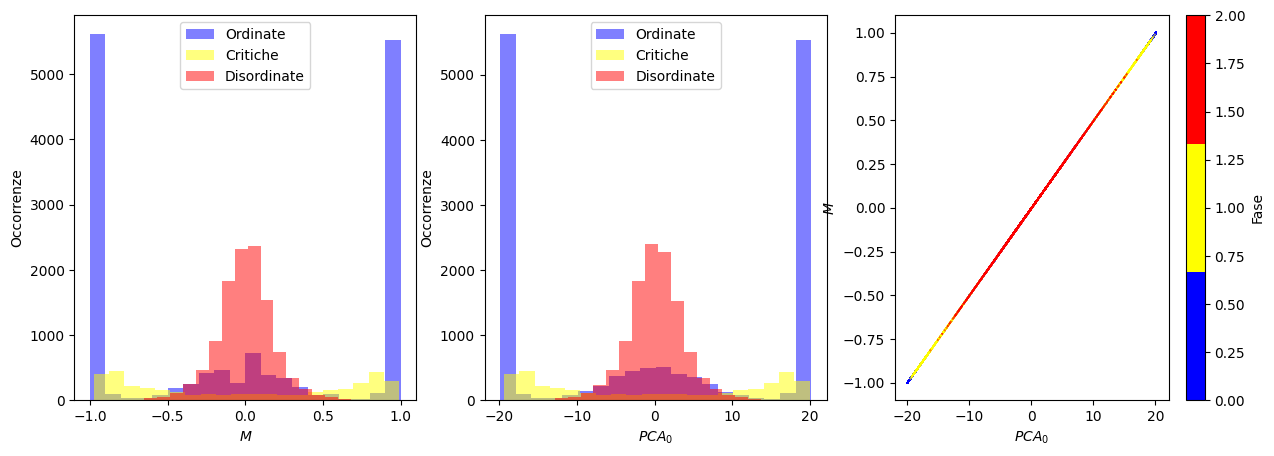

In [ ]:
#@title Soluzione 1.4

# magnetizzazione e pca per le diverse configurazioni

M_ising_0 = M[ord_sele]
M_ising_1 = M[cri_sele]
M_ising_2 = M[dis_sele]

pca_ising_0 = (pca_result[:,0])[ord_sele]
pca_ising_1 = (pca_result[:,0])[cri_sele]
pca_ising_2 = (pca_result[:,0])[dis_sele]

# isogrammi M e PCA
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(M_ising_0, bins=20, color='blue', alpha=0.5, label='Ordinate')
plt.hist(M_ising_1, bins=20, color='yellow', alpha=0.5, label='Critiche')
plt.hist(M_ising_2, bins=20, color='red', alpha=0.5, label='Disordinate')
plt.xlabel('$M$')
plt.ylabel('Occorrenze')
plt.legend()

plt.subplot(1,3,2)
plt.hist(pca_ising_0, bins=20, color='blue', alpha=0.5, label='Ordinate')
plt.hist(pca_ising_1, bins=20, color='yellow', alpha=0.5, label='Critiche')
plt.hist(pca_ising_2, bins=20, color='red', alpha=0.5, label='Disordinate')
plt.xlabel('$PCA_0$')
plt.ylabel('Occorrenze')
plt.legend()


# istogramma magnetizzazione
plt.subplot(1,3,3)
plt.scatter(pca_result[:,0], M, s=0.1, c=Y, cmap=my_cmap)
cbar = plt.colorbar()
cbar.set_label('Fase')
plt.xlabel('$PCA_0$')
plt.ylabel('$M$');

plt.show()

# la prima componente principale corrisponde alla magnetizzazione media dei campioni
# (in effetti il modello di ising2D dipende da un unico parametro d'ordine che descrive
# la transizione di fase ordine-disordine, rappresentato proprio dalla magnetizzazione del sistema).

**Parte 2:**

Analisi PCA: campione MNIST

0.   normalizzare le immagini in [0,1] e graficare le prime 16 immagini mnist

1.   implementare un'analisi a componenti prncipali (PCA) usando la libreria sklearn sul campione MNIST

2.   printare il valore della varianza spiegata per le prime 10 componenti PCA

3.   graficare lo scatter plot delle prime due componenti principali in cui ogni configurazione viene colorata in accordo al valore della label di classe Y_mnist (0,1,2,3,...,9)

4.   applicare la trasformzione inversa PCA per tornare nello spazio originale alle prime 10 componenti principali, e graficare le prime 16 immagini mnist confrontandole con le immagini originali ... cosa è cambiato? Perché?
Riprovare usando 2 componenti principali, cosa cambia? Quante componenti sono necessarie per avere una ricostruzione in cui i caratteri siano percepibili?

In [ ]:
#scarica e legge dataset MNIST from openml (https://openml.org/)
from sklearn.datasets import fetch_openml

X_mnist, Y_mnist = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False, parser="pandas")

print(X_mnist.shape)
print(Y_mnist.shape)
Y_mnist = Y_mnist.astype(int)

(70000, 784)
(70000,)


<Figure size 640x480 with 0 Axes>

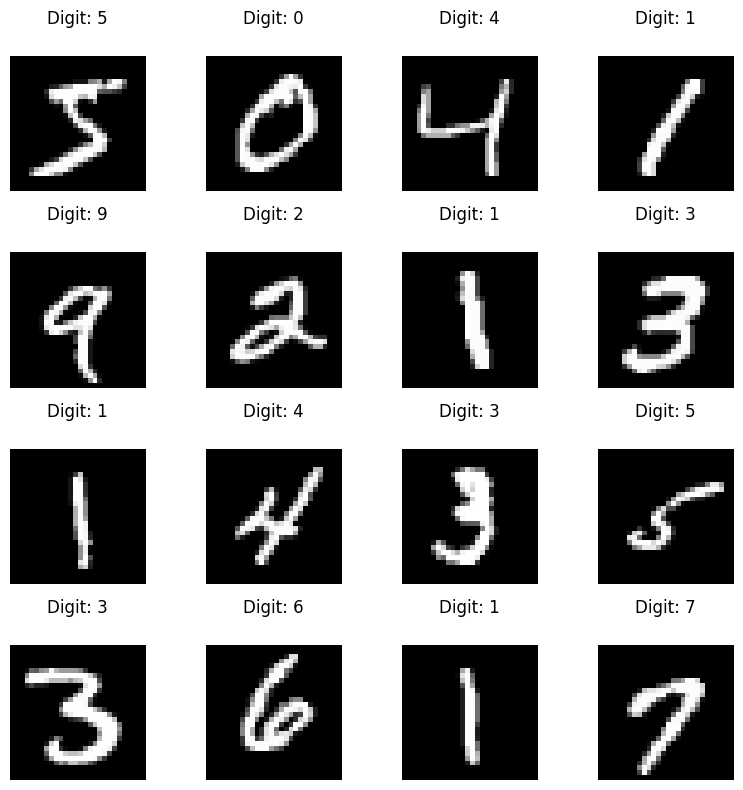

In [ ]:
#@title Soluzione 2.0

# normalizzazione

#NOTA: prima di applicare la PCA è importante normalizzare le feature in modo che abbiano
# varianze simili. Nel caso specifico del campione Ising2D non è necessario farlo
# perché i valori di ogni spin (pixel) sono già compresi tra -1 e 1 per costruzione

X_mnist = X_mnist/256.

import matplotlib.pyplot as plt
plt.gray()
fig = plt.figure( figsize=(8,8) )

for i in range(0,16):
  ax = fig.add_subplot(4,4,i+1, title='Digit: {}'.format(str(Y_mnist[i])))
  ax.matshow(X_mnist[i].reshape(28,28).astype(float))
  plt.axis('off')
plt.tight_layout()
plt.show()

explained variance componente:  0  =  0.09746115922494748
explained variance componente:  1  =  0.07155444586878705
explained variance componente:  2  =  0.0614953098072303
explained variance componente:  3  =  0.05403384528548191
explained variance componente:  4  =  0.04888933703877894
explained variance componente:  5  =  0.04305227030030036
explained variance componente:  6  =  0.032782615230699245
explained variance componente:  7  =  0.028896415661900415
explained variance componente:  8  =  0.02758364197622649
explained variance componente:  9  =  0.023421401676616677
Explained variance totale delle prime 10 componenti della PCA: 0.4891704420709689


Text(0, 0.5, '$PCA_1$')

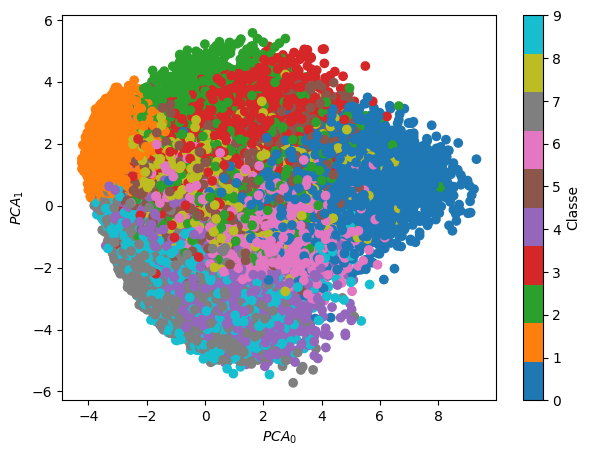

In [ ]:
#@title Soluzione 2.1-2.2-2.3

from sklearn.decomposition import PCA

pca2 = PCA(n_components=10)

pca2_result = pca2.fit_transform(X_mnist)

exp_var2 = pca2.explained_variance_ratio_

for i in range(0,len(exp_var2)):
  print('explained variance componente: ',i, ' = ', exp_var2[i])
print('Explained variance totale delle prime 10 componenti della PCA: {}'.format(sum(exp_var2)))

import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.scatter(pca2_result[:,0], pca2_result[:,1], c=Y_mnist, cmap='tab10')
cbar = plt.colorbar()
cbar.set_label('Classe')
plt.xlabel('$PCA_0$')
plt.ylabel('$PCA_1$')

<Figure size 640x480 with 0 Axes>

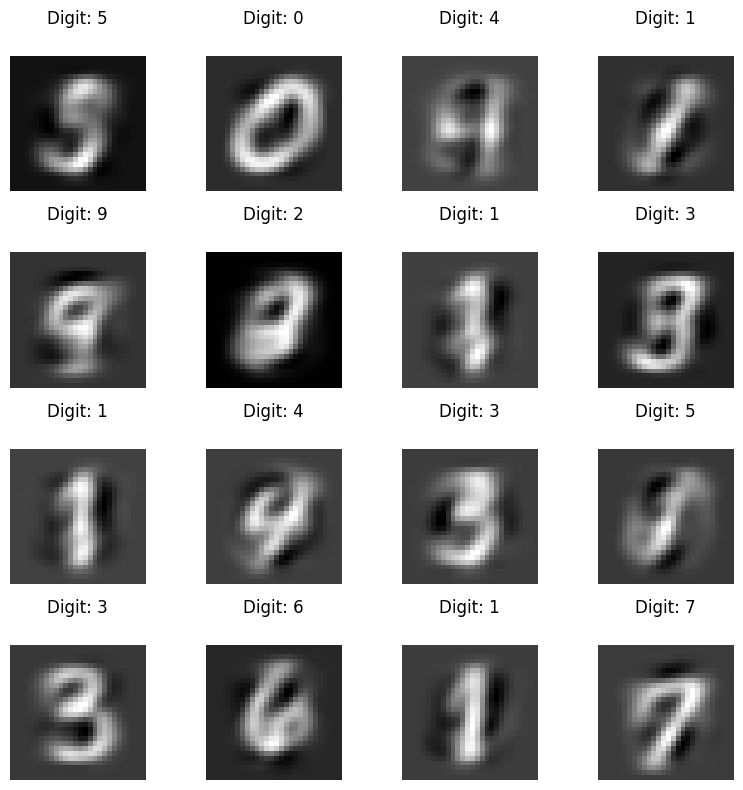

In [ ]:
#@title Soluzione 2.4


# pca transformation: X -> PCA
# inverse pca transformation: PCA -> X'
# nota: X' non e' uguale a X perché parte dell'informazione e' andata perduta avendo salvato solo
# n_components della PCA e non tutte (più il numero di componenti è piccolo più la
# perdita di informazione è consistente)

# applichiamo la trasformazione solo alle prime 16 immagini
Xtransf_mnist = pca2.inverse_transform(pca2_result[:16])

# plottiamo le immagini
plt.gray()
fig = plt.figure(figsize=(8,8))

for i in range(0,16):
  ax = fig.add_subplot(4,4,i+1, title='Digit: {}'.format(str(Y_mnist[i])))
  ax.matshow(Xtransf_mnist[i].reshape(28,28).astype(float))
  plt.axis('off')
plt.tight_layout()
plt.show()

**Parte 3:**

Ripetere la parte 1 (punti 1,3) usando tSNE come algoritmo di rappresentazione di manifold multidimensionali (usare n_components del TSNE=2):

`from sklearn.manifold import TSNE`

NOTA: tSNE può essere molto lento se il numero di feature x numero di eventi è grande. Usare solo i primi 5000 eventi del campione Ising2D (ricordate di fare un reshuffle degli eventi prima di selezionarne 5000, potete usare *sklearn.utile.shuffle*). Applicare tSNE, per diversi valori della perplexity: 5, 50 e 500 e confrontare i plot nello spazio tSNE0 vs tSNE1.

In [ ]:
#code

In [ ]:
#@title Soluzione 3A

from sklearn.manifold import TSNE
from sklearn.utils import shuffle
import time

# randomizziamo gli eventi nel campione
Sr, Tr, Mr, Yr = shuffle(S,T,M,Y, random_state=12345)

# è utile testare diversi valori della perplexity e scegliere quello che
# fornisce la migliore rappresentazione

tsne_result = []

time_start = time.time()
for perplexity in [5,50,500]:
  tsne = TSNE(n_components=2, verbose=1, random_state=12345, perplexity=perplexity, max_iter=300)
  %time res = tsne.fit_transform(Sr.reshape((Sr.shape[0],20*20))[:5000])
  tsne_result.append(res)
print('Total time elapsed: {} seconda'.format(time.time()-time_start))

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.003s...
[t-SNE] Computed neighbors for 5000 samples in 0.832s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 100.949661
[t-SNE] KL divergence after 300 iterations: 3.434448
CPU times: user 20.8 s, sys: 17.7 ms, total: 20.8 s
Wall time: 20.7 s
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.002s...
[t-SNE] Computed neighbors for 5000 samples in 1.087s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditi

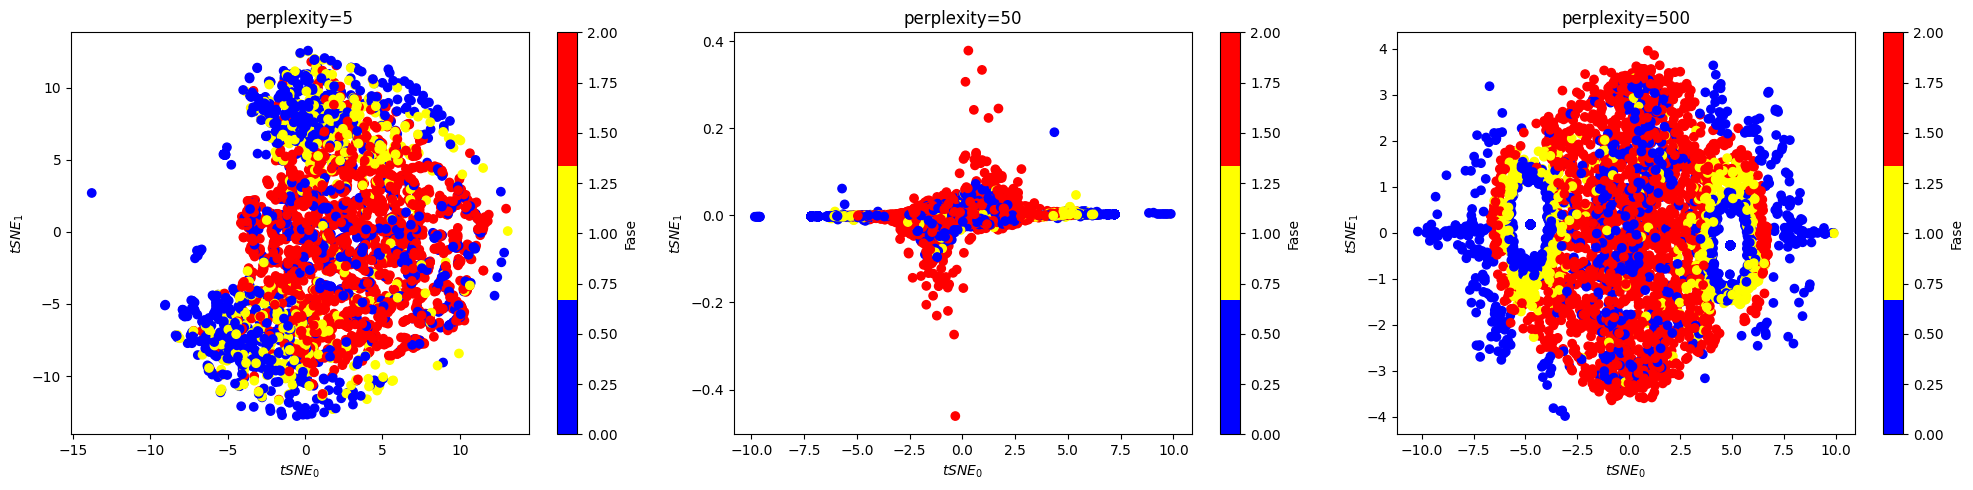

In [ ]:
#@title Plot 3A

plt.figure(figsize=(20,5))

ax1 = plt.subplot(1,3,1)
plt.scatter(tsne_result1[:,0], tsne_result1[:,1], c=Yr[:5000], cmap=my_cmap)
ax1.title.set_text('perplexity=5')
cbar = plt.colorbar()
cbar.set_label('Fase')
plt.xlabel('$tSNE_0$')
plt.ylabel('$tSNE_1$')

ax2 = plt.subplot(1,3,2)
plt.scatter(tsne_result2[:,0], tsne_result2[:,1], c=Yr[:5000], cmap=my_cmap)
ax2.title.set_text('perplexity=50')
cbar = plt.colorbar()
cbar.set_label('Fase')
plt.xlabel('$tSNE_0$')
plt.ylabel('$tSNE_1$')

ax3 = plt.subplot(1,3,3)
plt.scatter(tsne_result3[:,0], tsne_result3[:,1], c=Yr[:5000], cmap=my_cmap)
ax3.title.set_text('perplexity=500')
cbar = plt.colorbar()
cbar.set_label('Fase')
plt.xlabel('$tSNE_0$')
plt.ylabel('$tSNE_1$')

plt.tight_layout()

**Parte 4:**

Ripetere la parte 1 (punti 1,3) usando UMAP come algoritmo di rappresentazione di manifold multidimensionali, applicarlo solo sui primi 5000 eventi


```
!pip install umap-learn

import umap  # pip install umap-learn

manifold = umap.UMAP(n_neighbors=3, min_dist=0.5)).fit(X)
manifold_reduced = manifold.transform(X)

#e poi plottare manifold_reduced[:,0] vs [:,1] come fatto per PCA e tSNE

```

Quali sono le differenze?

In [ ]:
# installiamo la libreria umap-learn
!pip install umap-learn

In [ ]:
#code

In [ ]:
#@title Soluzione 4
import umap

manifold = umap.UMAP(n_neighbors=3, min_dist=0.5).fit(Sr.reshape((Sr.shape[0],20*20))[:5000])
%time X_ising_reduced = manifold.transform(Sr.reshape((Sr.shape[0],20*20))[:5000])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


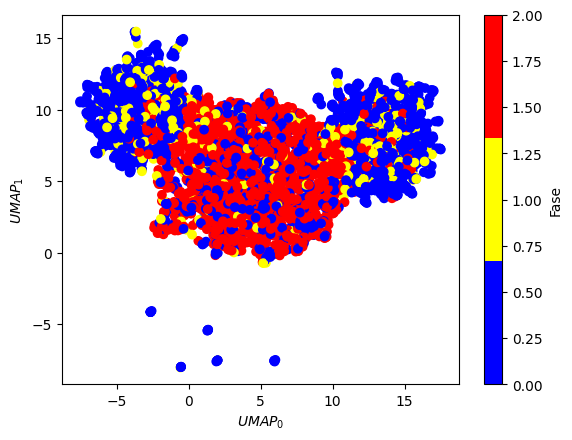

In [ ]:
#@title Plot 4
plt.scatter(X_ising_reduced[:,0], X_ising_reduced[:,1], c=Yr[:5000], cmap=my_cmap)
cbar = plt.colorbar()
cbar.set_label('Fase')
plt.xlabel('$UMAP_0$')
plt.ylabel('$UMAP_1$')
plt.show()

**Per casa:**

* giocare con i vari algorimti, i parametri da cui dipendono, etc..
* applicare tSNE e UMAP al campione MNIST, sono in grado di rappresentare meglio della PCA il campione in 2D?

documentazione:

*   PCA e tSNE sul sito di [scikit-learn](https://scikit-learn.org/stable/)
*   UMAP sul sito di [umap-learn](https://umap-learn.readthedocs.io/en/latest/index.html)


